In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import torch
import math
import random
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
import torchtuples as tt
from torchtuples import Model
from sklearn.model_selection import train_test_split
from torch import nn, Tensor
import matplotlib.pyplot as plt
from scipy.stats import norm
import os
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
importr('quantreg')

from torch import nn, Tensor
from dqAux_new import dqNetSparse
from localrqgrid import lprq0g
from localrq import lprq0
from ph import ph
from bandwidthaic import bandwidthaic
from ci import cifint

In [2]:
#Generate GARCH(1,1)

B=500
grid=np.arange(-1.75,1.85,0.1)
ngrid=len(grid)

ECR10=np.zeros((B,ngrid))
ECR11=np.zeros((B,ngrid))
ECR12=np.zeros((B,ngrid))
ECR13=np.zeros((B,ngrid))
ECR14=np.zeros((B,ngrid))
ECR15=np.zeros((B,ngrid))
ECR16=np.zeros((B,ngrid))
ECR17=np.zeros((B,ngrid))
ECR18=np.zeros((B,ngrid))

ECR20=np.zeros((B,ngrid))
ECR21=np.zeros((B,ngrid))
ECR22=np.zeros((B,ngrid))
ECR23=np.zeros((B,ngrid))
ECR24=np.zeros((B,ngrid))
ECR25=np.zeros((B,ngrid))
ECR26=np.zeros((B,ngrid))
ECR27=np.zeros((B,ngrid))
ECR28=np.zeros((B,ngrid))

ECR30=np.zeros((B,ngrid))
ECR31=np.zeros((B,ngrid))
ECR32=np.zeros((B,ngrid))
ECR33=np.zeros((B,ngrid))
ECR34=np.zeros((B,ngrid))
ECR35=np.zeros((B,ngrid))
ECR36=np.zeros((B,ngrid))
ECR37=np.zeros((B,ngrid))
ECR38=np.zeros((B,ngrid))

ECR40=np.zeros((B,ngrid))
ECR41=np.zeros((B,ngrid))
ECR42=np.zeros((B,ngrid))
ECR43=np.zeros((B,ngrid))
ECR44=np.zeros((B,ngrid))
ECR45=np.zeros((B,ngrid))
ECR46=np.zeros((B,ngrid))
ECR47=np.zeros((B,ngrid))
ECR48=np.zeros((B,ngrid))

#Define functional coefficients
def g10(x): return 1.5*np.exp(-3*(x+1)**2)+1*np.exp(-8*(x-1)**2)
def g11(x): return (0.15*np.exp(4*x)/(1+np.exp(4*x)))
def g12(x): return (0.04*(x)**2)
def g13(x): return (0.15*np.exp(-4*x)/(1+np.exp(-4*x)))
def g14(x): return (0.1*((np.cos(x))**2))
def g15(x): return (0.15*np.exp(4*x)/(1+np.exp(4*x)))
def g16(x): return (0.04*(x)**2)
def g17(x): return (0.15*np.exp(-4*x)/(1+np.exp(-4*x)))
def g18(x): return (0.1*((np.cos(x))**2))

def g20(x): return 1.5*np.exp(-3*(x-1)**2)+1*np.exp(-8*(x+1)**2)
def g21(x): return (0.1*np.sin(-0.8*np.pi*x)+0.1)
def g22(x): return (0.15*np.exp(4*x)/(1+np.exp(4*x)))
def g23(x): return (0.1*np.sin(-0.8*np.pi*x)+0.1)
def g24(x): return (0.15*np.exp(-4*x)/(1+np.exp(-4*x)))
def g25(x): return (0.1*np.sin(-0.8*np.pi*x)+0.1)
def g26(x): return (0.15*np.exp(4*x)/(1+np.exp(4*x)))
def g27(x): return (0.1*np.sin(-0.8*np.pi*x)+0.1)
def g28(x): return (0.15*np.exp(-4*x)/(1+np.exp(-4*x)))
    
def g30(x): return 1.5*np.exp(-3*(x+1)**2)+1*np.exp(-8*(x-1)**2)
def g31(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)
def g32(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)
def g33(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)
def g34(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)
def g35(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)
def g36(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)
def g37(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)
def g38(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)

def g40(x): return 1.5*np.exp(-3*(x-1)**2)+1*np.exp(-8*(x+1)**2)
def g41(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)
def g42(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)
def g43(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)
def g44(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)
def g45(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)
def g46(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)
def g47(x): return (0.1*np.cos(0.8*np.pi*x)+0.1)
def g48(x): return (0.1*np.sin(0.8*np.pi*x)+0.1)

tau=0.15
n=4000

for b in range(B):  
    
 index=np.zeros((n,1))
 coefx1=np.zeros((n,9))
 coefx2=np.zeros((n,9))
 coefx3=np.zeros((n,9))
 coefx4=np.zeros((n,9))
  
 Y1=np.zeros((n,1))
 Y1[0]=0
 stdev1=np.zeros((n,1))
 stdev1[0]=1
 Y2=np.zeros((n,1))
 Y2[0]=0
 stdev2=np.zeros((n,1))
 stdev2[0]=1
  
 Y3=np.zeros((n,1))
 Y3[0]=0
 stdev3=np.zeros((n,1))
 stdev3[0]=1
 Y4=np.zeros((n,1))
 Y4[0]=0
 stdev4=np.zeros((n,1))
 stdev4[0]=1 

 for j in range(2,(n+1)):
    
     index[j-1]=np.random.uniform(-2,2+10**-10,1)
     e1=np.random.uniform(0,1+10**-10,1)
     e2=np.random.uniform(0,1+10**-10,1)
     e3=np.random.uniform(0,1+10**-10,1)
     e4=np.random.uniform(0,1+10**-10,1)
     e31=(0.2*(e1)**2)+0.8
     e32=(0.2*np.exp(e1))+0.8
     e41=(0.2*(e2)**2)+0.8
     e42=(0.2*np.exp(e2))+0.8
     e51=(0.2*(e3)**2)+0.8
     e52=(0.2*np.exp(e3))+0.8
     e61=(0.2*(e4)**2)+0.8
     e62=(0.2*np.exp(e4))+0.8
    
     e5=np.random.normal(0,1,1)
     e6=np.random.normal(0,1,1)   
     e7=np.random.normal(0,1,1) 
     e8=np.random.normal(0,1,1) 

     coefx1[j-1,]=[g10(index[j-1]).item(),(g11(index[j-1])*e31).item(),(g12(index[j-1])*e32).item(),(g13(index[j-1])*e31).item(),(g14(index[j-1])*e32).item(),g15(index[j-1]).item(),g16(index[j-1]).item(),g17(index[j-1]).item(),g18(index[j-1]).item()]
     coefx2[j-1,]=[g20(index[j-1]).item(),(g21(index[j-1])*e41).item(),(g22(index[j-1])*e42).item(),(g23(index[j-1])*e41).item(),(g24(index[j-1])*e42).item(),g25(index[j-1]).item(),g26(index[j-1]).item(),g27(index[j-1]).item(),g28(index[j-1]).item()]
     coefx3[j-1,]=[g30(index[j-1]).item(),(g31(index[j-1])*e51).item(),(g32(index[j-1])*e52).item(),(g33(index[j-1])*e51).item(),(g34(index[j-1])*e52).item(),g35(index[j-1]).item(),g36(index[j-1]).item(),g37(index[j-1]).item(),g38(index[j-1]).item()]
     coefx4[j-1,]=[g40(index[j-1]).item(),(g41(index[j-1])*e61).item(),(g42(index[j-1])*e62).item(),(g43(index[j-1])*e61).item(),(g44(index[j-1])*e62).item(),g45(index[j-1]).item(),g46(index[j-1]).item(),g47(index[j-1]).item(),g48(index[j-1]).item()]
    
     stdev1[j-1]=np.dot(coefx1[j-1,],[1,stdev1[j-2].item(),stdev2[j-2].item(),stdev3[j-2].item(),stdev4[j-2].item(),np.absolute(Y1[j-2]).item(),np.absolute(Y2[j-2]).item(),np.absolute(Y3[j-2]).item(),np.absolute(Y4[j-2]).item()])
     stdev2[j-1]=np.dot(coefx2[j-1,],[1,stdev1[j-2].item(),stdev2[j-2].item(),stdev3[j-2].item(),stdev4[j-2].item(),np.absolute(Y1[j-2]).item(),np.absolute(Y2[j-2]).item(),np.absolute(Y3[j-2]).item(),np.absolute(Y4[j-2]).item()])
     stdev3[j-1]=np.dot(coefx3[j-1,],[1,stdev1[j-2].item(),stdev2[j-2].item(),stdev3[j-2].item(),stdev4[j-2].item(),np.absolute(Y1[j-2]).item(),np.absolute(Y2[j-2]).item(),np.absolute(Y3[j-2]).item(),np.absolute(Y4[j-2]).item()])
     stdev4[j-1]=np.dot(coefx4[j-1,],[1,stdev1[j-2].item(),stdev2[j-2].item(),stdev3[j-2].item(),stdev4[j-2].item(),np.absolute(Y1[j-2]).item(),np.absolute(Y2[j-2]).item(),np.absolute(Y3[j-2]).item(),np.absolute(Y4[j-2]).item()])
    
     Y1[j-1]=stdev1[j-1]*e5
     Y2[j-1]=stdev2[j-1]*e6
     Y3[j-1]=stdev3[j-1]*e7
     Y4[j-1]=stdev4[j-1]*e8
 
 Y1=Y1[1:n]
 Y2=Y2[1:n]
 Y3=Y3[1:n]
 Y4=Y4[1:n]
 stdev1=stdev1[1:n]
 stdev2=stdev2[1:n]
 stdev3=stdev3[1:n]
 stdev4=stdev4[1:n]
 index=index[1:n]
 n=np.size(index,0)
  
 ymax1=np.max(Y1)
 ymax2=np.max(Y2)
 ymin1=np.min(Y1)
 ymin2=np.min(Y2)
 ymax3=np.max(Y3)
 ymax4=np.max(Y4)
 ymin3=np.min(Y3)
 ymin4=np.min(Y4)

 yrange1=np.max(ymax1)-np.min(ymin1)
 yrange2=np.max(ymax2)-np.min(ymin2)
 yrange3=np.max(ymax3)-np.min(ymin3)
 yrange4=np.max(ymax4)-np.min(ymin4) 
    
 #Preliminary step
 L=1#int(np.floor(0.4*np.log(n)))
 preY=np.hstack((Y1,Y2,Y3,Y4))
 Y=np.hstack((Y1[(L+1):(n-1)],Y2[(L+1):(n-1)],Y3[(L+1):(n-1)],Y4[(L+1):(n-1)]))
 indexz=index[(L+1):(n-1)]
 kap=np.size(preY,1)
 preY11=np.zeros(((n-L-2),(kap*(L+1))))
 indexzz=np.zeros(((n-L-2),(L+1)))
  
 for lg in range(L+1):
    
   preY11[:,(kap*lg):(kap*(lg+1))]=np.absolute(preY[((L+1)-lg-1):(n-1-lg-1),:])
   indexzz[:,lg]=index[((L+1)-(lg)):((n-1)-(lg))].reshape(-1)

 nm0=np.zeros((L+2,1))
 nm0[0]=0
 for l in range(L+1):
   nm0[(l+1)]=nm0[l]+(l+1)+kap
 nm0[0]=0
 nm=nm0.astype(int)

 x_trainin=np.zeros((n-L-2,nm[L+1][0]))
 for ll in range(L+1):
   x_trainin[:,(nm[ll][0]):nm[(ll+1)][0]]=np.hstack((indexzz[:,0:(ll+1)],preY11[:,(kap*ll):(kap*(ll+1))]))

 # standardize covariates
 Y_1=torch.tensor(Y[:,0].reshape(-1,1).astype('float32'))
 Y_2=torch.tensor(Y[:,1].reshape(-1,1).astype('float32'))
 Y_3=torch.tensor(Y[:,2].reshape(-1,1).astype('float32'))
 Y_4=torch.tensor(Y[:,3].reshape(-1,1).astype('float32'))
 indexz=torch.tensor(indexz.astype('float32'))

 preY11=torch.tensor(preY11.astype('float32'))
 indexzz=torch.tensor(indexzz.astype('float32'))
 #x_train=torch.cat((indexzz,preY11),1) 
 x_test=torch.tensor(x_trainin.astype('float32'))
    
 # hyperparameters
 nodes = [2,128] # number of network layers and nodes per layer
 lr = 0.001
 epochs = 500
 verbose = False
 sparseRatio = 0.5

 # neural networks
 Netnew1=torch.load(r'E:/learning_python/weights/catdogclassifi_0.15_4000_1-%s.pth' % (239))
 sigmatile1=Netnew1(x_test).detach().numpy()

 Netnew2=torch.load(r'E:/learning_python/weights/catdogclassifi_0.15_4000_2-%s.pth' % (284))
 sigmatile2=Netnew2(x_test).detach().numpy() 

 Netnew3=torch.load(r'E:/learning_python/weights/catdogclassifi_0.15_4000_3-%s.pth' % (139))
 sigmatile3=Netnew3(x_test).detach().numpy()

 Netnew4=torch.load(r'E:/learning_python/weights/catdogclassifi_0.15_4000_4-%s.pth' % (187))
 sigmatile4=Netnew4(x_test).detach().numpy()

 sigmatile=np.hstack((sigmatile1,sigmatile2,sigmatile3,sigmatile4)) 
    
 #Step 2
 L1=1
 Ynew=np.hstack((Y1[(L+2):n],Y2[(L+2):n],Y3[(L+2):n],Y4[(L+2):n]))
 indexzz2=index[(L+2):n]
 ztile1=np.hstack((sigmatile,np.absolute(Y)))
  
 ymax1=np.max(Y1)
 ymax2=np.max(Y2)
 ymin1=np.min(Y1)
 ymin2=np.min(Y2)
 ymax3=np.max(Y3)
 ymax4=np.max(Y4)
 ymin3=np.min(Y3)
 ymin4=np.min(Y4)

 b11=0.06*19.17221
 b12=0.3*19.17221
 b21=0.06*19.41568
 b22=0.3*19.41568
  
 y_rangenew1=np.median(ymax1)-np.median(ymin1)
 h0cnew1=np.arange(b11*((n-L-L1-1)**-0.2),b12*((n-L-L1-1)**-0.2),0.2)
 y_rangenew2=np.median(ymax2)-np.median(ymin2)
 h0cnew2=np.arange(b21*((n-L-L1-1)**-0.2),b22*((n-L-L1-1)**-0.2),0.2)
 nh1=len(h0cnew1)
 nh2=len(h0cnew2)
 aicval1=np.zeros(nh1)
 aicval2=np.zeros(nh2)
 aicval3=np.zeros(nh1)
 aicval4=np.zeros(nh2)

 #for kk1 in range(nh1):
   #aic,RSSm=bandwidthaic(Ynew[:,0],ztile1,tau,h0cnew1[kk1],indexzz2,indexzz2)
   #aicval1[kk1]=aic
   #print(kk1)

 #ind5=np.argmin(aicval1)
 #hpf5=h0cnew1[ind5]  
 #hpf5
 hpf5=0.8190273

 #for kk2 in range(nh2):
   #aic,RSSm=bandwidthaic(Ynew[:,1],ztile1,tau,h0cnew2[kk2],indexzz2,indexzz2)
   #aicval2[kk2]=aic
   #print(kk2)
  
 #ind6=np.argmin(aicval2)
 #hpf6=h0cnew2[ind6]
 #hpf6
 hpf6=0.8218088   

 #for kk3 in range(nh1):
   #aic,RSSm=bandwidthaic(Ynew[:,2],ztile1,tau,h0cnew1[kk3],indexzz2,indexzz2)
   #aicval3[kk3]=aic
   #print(kk3)
  
 #ind7=np.argmin(aicval3)
 #hpf7=h0cnew1[ind7]  
 #hpf7
 hpf7=0.8190273 

 #for kk4 in range(nh2):
   #aic,RSSm=bandwidthaic(Ynew[:,3],ztile1,tau,h0cnew2[kk4],indexzz2,indexzz2)
   #aicval4[kk4]=aic
   #print(kk4)
  
 #ind8=np.argmin(aicval4)
 #hpf8=h0cnew2[ind8]
 #hpf8
 hpf8=0.8218088

 grid=np.arange(-1.75,1.85,0.1)
 ngrid=len(grid)

 fv, dv, w0 = lprq0g(Ynew[:,0], ztile1, hpf5, tau, indexzz2, grid)
 ainfinal1=fv
 fv, dv, w0 = lprq0g(Ynew[:,1], ztile1, hpf6, tau, indexzz2, grid)
 ainfinal2=fv
  
 fv, dv, w0 = lprq0g(Ynew[:,2], ztile1, hpf7, tau, indexzz2, grid)
 ainfinal3=fv
 fv, dv, w0 = lprq0g(Ynew[:,3], ztile1, hpf8, tau, indexzz2, grid)
 ainfinal4=fv

 #Confidence interval
 #CI1
 uerror,lerror=cifint(Ynew[:,0],ztile1,ainfinal1,hpf5,tau,indexzz2,grid)
 uerror1=uerror
 lerror1=lerror
  
 ainfadj1=ainfinal1
 upper1=ainfadj1+uerror1
 lower1=ainfadj1+lerror1

 #CI2
 uerror,lerror=cifint(Ynew[:,1],ztile1,ainfinal2,hpf6,tau,indexzz2,grid)
 uerror2=uerror
 lerror2=lerror
  
 ainfadj2=ainfinal2
 upper2=ainfadj2+uerror2
 lower2=ainfadj2+lerror2

 #CI3
 uerror,lerror=cifint(Ynew[:,2],ztile1,ainfinal3,hpf7,tau,indexzz2,grid)
 uerror3=uerror
 lerror3=lerror
  
 ainfadj3=ainfinal3
 upper3=ainfadj3+uerror3
 lower3=ainfadj3+lerror3  

 #CI2
 uerror,lerror=cifint(Ynew[:,3],ztile1,ainfinal4,hpf8,tau,indexzz2,grid)
 uerror4=uerror
 lerror4=lerror
  
 ainfadj4=ainfinal4
 upper4=ainfadj4+uerror4
 lower4=ainfadj4+lerror4
    
 aintrue10=np.zeros(ngrid)
 aintrue11=np.zeros(ngrid)
 aintrue12=np.zeros(ngrid)
 aintrue13=np.zeros(ngrid)
 aintrue14=np.zeros(ngrid)
 aintrue15=np.zeros(ngrid)
 aintrue16=np.zeros(ngrid)
 aintrue17=np.zeros(ngrid)
 aintrue18=np.zeros(ngrid)
  
 aintrue20=np.zeros(ngrid)
 aintrue21=np.zeros(ngrid)
 aintrue22=np.zeros(ngrid)
 aintrue23=np.zeros(ngrid)
 aintrue24=np.zeros(ngrid)
 aintrue25=np.zeros(ngrid)
 aintrue26=np.zeros(ngrid)
 aintrue27=np.zeros(ngrid)
 aintrue28=np.zeros(ngrid)
  
 aintrue30=np.zeros(ngrid)
 aintrue31=np.zeros(ngrid)
 aintrue32=np.zeros(ngrid)
 aintrue33=np.zeros(ngrid)
 aintrue34=np.zeros(ngrid)
 aintrue35=np.zeros(ngrid)
 aintrue36=np.zeros(ngrid)
 aintrue37=np.zeros(ngrid)
 aintrue38=np.zeros(ngrid)
  
 aintrue40=np.zeros(ngrid)
 aintrue41=np.zeros(ngrid)
 aintrue42=np.zeros(ngrid)
 aintrue43=np.zeros(ngrid)
 aintrue44=np.zeros(ngrid)
 aintrue45=np.zeros(ngrid)
 aintrue46=np.zeros(ngrid)
 aintrue47=np.zeros(ngrid)
 aintrue48=np.zeros(ngrid)
    
 for k in range(ngrid):
    aintrue10[k]=g10(grid[k]).item()
    aintrue11[k]=g11(grid[k]).item()
    aintrue12[k]=g12(grid[k]).item()
    aintrue13[k]=g13(grid[k]).item()
    aintrue14[k]=g14(grid[k]).item()
    aintrue15[k]=g15(grid[k]).item()
    aintrue16[k]=g16(grid[k]).item()
    aintrue17[k]=g17(grid[k]).item()
    aintrue18[k]=g18(grid[k]).item()
    
  
 for k in range(ngrid):
    aintrue20[k]=g20(grid[k]).item()
    aintrue21[k]=g21(grid[k]).item()
    aintrue22[k]=g22(grid[k]).item()
    aintrue23[k]=g23(grid[k]).item()
    aintrue24[k]=g24(grid[k]).item()
    aintrue25[k]=g25(grid[k]).item()
    aintrue26[k]=g26(grid[k]).item()
    aintrue27[k]=g27(grid[k]).item()
    aintrue28[k]=g28(grid[k]).item()
    
  
 for k in range(ngrid):
    aintrue30[k]=g30(grid[k]).item()
    aintrue31[k]=g31(grid[k]).item()
    aintrue32[k]=g32(grid[k]).item()
    aintrue33[k]=g33(grid[k]).item()
    aintrue34[k]=g34(grid[k]).item()
    aintrue35[k]=g35(grid[k]).item()
    aintrue36[k]=g36(grid[k]).item()
    aintrue37[k]=g37(grid[k]).item()
    aintrue38[k]=g38(grid[k]).item()
    
  
 for k in range(ngrid):
    aintrue40[k]=g40(grid[k]).item()
    aintrue41[k]=g41(grid[k]).item()
    aintrue42[k]=g42(grid[k]).item()
    aintrue43[k]=g43(grid[k]).item()
    aintrue44[k]=g44(grid[k]).item()
    aintrue45[k]=g45(grid[k]).item()
    aintrue46[k]=g46(grid[k]).item()
    aintrue47[k]=g47(grid[k]).item()
    aintrue48[k]=g48(grid[k]).item()

 for g in range(ngrid):
    
    ECR10[b,g]=(1 if lower1[g,0]<=aintrue10[g]*(norm.ppf(tau,0,1)) and aintrue10[g]*(norm.ppf(tau,0,1))<=upper1[g,0] else 0)
    ECR11[b,g]=(1 if lower1[g,1]<=aintrue11[g]*((0.2*(tau)**2)+0.8) and aintrue11[g]*((0.2*(tau)**2)+0.8)<=upper1[g,1] else 0)
    ECR12[b,g]=(1 if lower1[g,2]<=aintrue12[g]*((0.2*np.exp(tau))+0.8) and aintrue12[g]*((0.2*np.exp(tau))+0.8)<=upper1[g,2] else 0)
    ECR13[b,g]=(1 if lower1[g,3]<=aintrue13[g]*((0.2*(tau)**2)+0.8) and aintrue13[g]*((0.2*(tau)**2)+0.8)<=upper1[g,3] else 0)
    ECR14[b,g]=(1 if lower1[g,4]<=aintrue14[g]*((0.2*np.exp(tau))+0.8) and aintrue14[g]*((0.2*np.exp(tau))+0.8)<=upper1[g,4] else 0)
    ECR15[b,g]=(1 if lower1[g,5]<=aintrue15[g]*(norm.ppf(tau,0,1)) and aintrue15[g]*(norm.ppf(tau,0,1))<=upper1[g,5] else 0)
    ECR16[b,g]=(1 if lower1[g,6]<=aintrue16[g]*(norm.ppf(tau,0,1)) and aintrue16[g]*(norm.ppf(tau,0,1))<=upper1[g,6] else 0)
    ECR17[b,g]=(1 if lower1[g,7]<=aintrue17[g]*(norm.ppf(tau,0,1)) and aintrue17[g]*(norm.ppf(tau,0,1))<=upper1[g,7] else 0)
    ECR18[b,g]=(1 if lower1[g,8]<=aintrue18[g]*(norm.ppf(tau,0,1)) and aintrue18[g]*(norm.ppf(tau,0,1))<=upper1[g,8] else 0)
    
    ECR20[b,g]=(1 if lower2[g,0]<=aintrue20[g]*(norm.ppf(tau,0,1)) and aintrue20[g]*(norm.ppf(tau,0,1))<=upper2[g,0] else 0)
    ECR21[b,g]=(1 if lower2[g,1]<=aintrue21[g]*((0.2*(tau)**2)+0.8) and aintrue21[g]*((0.2*(tau)**2)+0.8)<=upper2[g,1] else 0)
    ECR22[b,g]=(1 if lower2[g,2]<=aintrue22[g]*((0.2*np.exp(tau))+0.8) and aintrue22[g]*((0.2*np.exp(tau))+0.8)<=upper2[g,2] else 0)
    ECR23[b,g]=(1 if lower2[g,3]<=aintrue23[g]*((0.2*(tau)**2)+0.8) and aintrue23[g]*((0.2*(tau)**2)+0.8)<=upper2[g,3] else 0)
    ECR24[b,g]=(1 if lower2[g,4]<=aintrue24[g]*((0.2*np.exp(tau))+0.8) and aintrue24[g]*((0.2*np.exp(tau))+0.8)<=upper2[g,4] else 0)
    ECR25[b,g]=(1 if lower2[g,5]<=aintrue25[g]*(norm.ppf(tau,0,1)) and aintrue25[g]*(norm.ppf(tau,0,1))<=upper2[g,5] else 0)
    ECR26[b,g]=(1 if lower2[g,6]<=aintrue26[g]*(norm.ppf(tau,0,1)) and aintrue26[g]*(norm.ppf(tau,0,1))<=upper2[g,6] else 0)
    ECR27[b,g]=(1 if lower2[g,7]<=aintrue27[g]*(norm.ppf(tau,0,1)) and aintrue27[g]*(norm.ppf(tau,0,1))<=upper2[g,7] else 0)
    ECR28[b,g]=(1 if lower2[g,8]<=aintrue28[g]*(norm.ppf(tau,0,1)) and aintrue28[g]*(norm.ppf(tau,0,1))<=upper2[g,8] else 0)
    
    ECR30[b,g]=(1 if lower3[g,0]<=aintrue30[g]*(norm.ppf(tau,0,1)) and aintrue30[g]*(norm.ppf(tau,0,1))<=upper3[g,0] else 0)
    ECR31[b,g]=(1 if lower3[g,1]<=aintrue31[g]*((0.2*(tau)**2)+0.8) and aintrue31[g]*((0.2*(tau)**2)+0.8)<=upper3[g,1] else 0)
    ECR32[b,g]=(1 if lower3[g,2]<=aintrue32[g]*((0.2*np.exp(tau))+0.8) and aintrue32[g]*((0.2*np.exp(tau))+0.8)<=upper3[g,2] else 0)
    ECR33[b,g]=(1 if lower3[g,3]<=aintrue33[g]*((0.2*(tau)**2)+0.8) and aintrue33[g]*((0.2*(tau)**2)+0.8)<=upper3[g,3] else 0)
    ECR34[b,g]=(1 if lower3[g,4]<=aintrue34[g]*((0.2*np.exp(tau))+0.8) and aintrue34[g]*((0.2*np.exp(tau))+0.8)<=upper3[g,4] else 0)
    ECR35[b,g]=(1 if lower3[g,5]<=aintrue35[g]*(norm.ppf(tau,0,1)) and aintrue35[g]*(norm.ppf(tau,0,1))<=upper3[g,5] else 0)
    ECR36[b,g]=(1 if lower3[g,6]<=aintrue36[g]*(norm.ppf(tau,0,1)) and aintrue36[g]*(norm.ppf(tau,0,1))<=upper3[g,6] else 0)
    ECR37[b,g]=(1 if lower3[g,7]<=aintrue37[g]*(norm.ppf(tau,0,1)) and aintrue37[g]*(norm.ppf(tau,0,1))<=upper3[g,7] else 0)
    ECR38[b,g]=(1 if lower3[g,8]<=aintrue38[g]*(norm.ppf(tau,0,1)) and aintrue38[g]*(norm.ppf(tau,0,1))<=upper3[g,8] else 0)
    
    ECR40[b,g]=(1 if lower4[g,0]<=aintrue40[g]*(norm.ppf(tau,0,1)) and aintrue40[g]*(norm.ppf(tau,0,1))<=upper4[g,0] else 0)
    ECR41[b,g]=(1 if lower4[g,1]<=aintrue41[g]*((0.2*(tau)**2)+0.8) and aintrue41[g]*((0.2*(tau)**2)+0.8)<=upper4[g,1] else 0)
    ECR42[b,g]=(1 if lower4[g,2]<=aintrue42[g]*((0.2*np.exp(tau))+0.8) and aintrue42[g]*((0.2*np.exp(tau))+0.8)<=upper4[g,2] else 0)
    ECR43[b,g]=(1 if lower4[g,3]<=aintrue43[g]*((0.2*(tau)**2)+0.8) and aintrue43[g]*((0.2*(tau)**2)+0.8)<=upper4[g,3] else 0)
    ECR44[b,g]=(1 if lower4[g,4]<=aintrue44[g]*((0.2*np.exp(tau))+0.8) and aintrue44[g]*((0.2*np.exp(tau))+0.8)<=upper4[g,4] else 0)
    ECR45[b,g]=(1 if lower4[g,5]<=aintrue45[g]*(norm.ppf(tau,0,1)) and aintrue45[g]*(norm.ppf(tau,0,1))<=upper4[g,5] else 0)
    ECR46[b,g]=(1 if lower4[g,6]<=aintrue46[g]*(norm.ppf(tau,0,1)) and aintrue46[g]*(norm.ppf(tau,0,1))<=upper4[g,6] else 0)
    ECR47[b,g]=(1 if lower4[g,7]<=aintrue47[g]*(norm.ppf(tau,0,1)) and aintrue47[g]*(norm.ppf(tau,0,1))<=upper4[g,7] else 0)
    ECR48[b,g]=(1 if lower4[g,8]<=aintrue48[g]*(norm.ppf(tau,0,1)) and aintrue48[g]*(norm.ppf(tau,0,1))<=upper4[g,8] else 0)
    
 print(b)
     

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1128\3308047405.py:223: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Netnew1=torch.load(r'E:/learning_python/weights/cat

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [3]:
TECR10=ECR10.sum(axis=0)/(B)
TECR11=ECR11.sum(axis=0)/(B)
TECR12=ECR12.sum(axis=0)/(B)
TECR13=ECR13.sum(axis=0)/(B)
TECR14=ECR14.sum(axis=0)/(B)
TECR15=ECR15.sum(axis=0)/(B)
TECR16=ECR16.sum(axis=0)/(B)
TECR17=ECR17.sum(axis=0)/(B)
TECR18=ECR18.sum(axis=0)/(B)

TECR20=ECR20.sum(axis=0)/(B)
TECR21=ECR21.sum(axis=0)/(B)
TECR22=ECR22.sum(axis=0)/(B)
TECR23=ECR23.sum(axis=0)/(B)
TECR24=ECR24.sum(axis=0)/(B)
TECR25=ECR25.sum(axis=0)/(B)
TECR26=ECR26.sum(axis=0)/(B)
TECR27=ECR27.sum(axis=0)/(B)
TECR28=ECR28.sum(axis=0)/(B)

TECR30=ECR30.sum(axis=0)/(B)
TECR31=ECR31.sum(axis=0)/(B)
TECR32=ECR32.sum(axis=0)/(B)
TECR33=ECR33.sum(axis=0)/(B)
TECR34=ECR34.sum(axis=0)/(B)
TECR35=ECR35.sum(axis=0)/(B)
TECR36=ECR36.sum(axis=0)/(B)
TECR37=ECR37.sum(axis=0)/(B)
TECR38=ECR38.sum(axis=0)/(B)

TECR40=ECR40.sum(axis=0)/(B)
TECR41=ECR41.sum(axis=0)/(B)
TECR42=ECR42.sum(axis=0)/(B)
TECR43=ECR43.sum(axis=0)/(B)
TECR44=ECR44.sum(axis=0)/(B)
TECR45=ECR45.sum(axis=0)/(B)
TECR46=ECR46.sum(axis=0)/(B)
TECR47=ECR47.sum(axis=0)/(B)
TECR48=ECR48.sum(axis=0)/(B)

In [4]:
#v1
np.sum(TECR10)/36

0.7495833333333333

In [5]:
np.sum(TECR11)/36

0.9137500000000001

In [6]:
np.sum(TECR12)/36

0.942361111111111

In [7]:
np.sum(TECR13)/36

0.9483333333333334

In [8]:
np.sum(TECR14)/36

0.9299999999999999

In [ ]:
np.sum(TECR15)/36

In [ ]:
np.sum(TECR16)/36

In [ ]:
np.sum(TECR17)/36

In [ ]:
np.sum(TECR18)/36

In [13]:
#v2
np.sum(TECR20)/36

0.8416666666666667

In [14]:
np.sum(TECR21)/36

0.9218055555555557

In [15]:
np.sum(TECR22)/36

0.9441666666666667

In [16]:
np.sum(TECR23)/36

0.953888888888889

In [17]:
np.sum(TECR24)/36

0.9409722222222222

In [ ]:
np.sum(TECR25)/36

In [ ]:
np.sum(TECR26)/36

In [ ]:
np.sum(TECR27)/36

In [ ]:
np.sum(TECR28)/36

In [ ]:
#v3
np.sum(TECR30)/36

In [ ]:
np.sum(TECR31)/36

In [ ]:
np.sum(TECR32)/36

In [ ]:
np.sum(TECR33)/36

In [ ]:
np.sum(TECR34)/36

In [ ]:
np.sum(TECR35)/36

In [ ]:
np.sum(TECR36)/36

In [ ]:
np.sum(TECR37)/36

In [ ]:
np.sum(TECR38)/36

In [ ]:
#v4
np.sum(TECR40)/36

In [ ]:
np.sum(TECR41)/36

In [ ]:
np.sum(TECR42)/36

In [ ]:
np.sum(TECR43)/36

In [ ]:
np.sum(TECR44)/36

In [ ]:
np.sum(TECR45)/36

In [ ]:
np.sum(TECR46)/36

In [ ]:
np.sum(TECR47)/36

In [ ]:
np.sum(TECR48)/36

In [40]:
np.mean(np.absolute((ainfinal1[:,1])-(aintrue11*((0.2*(tau)**2)+0.8))))

0.10364667031942891

In [41]:
np.mean(np.absolute((ainfinal1[:,2])-(aintrue12*((0.2*np.exp(tau))+0.8))))

0.043821941331300754

In [42]:
np.mean(np.absolute((ainfinal1[:,3])-(aintrue13*((0.2*(tau)**2)+0.8))))

0.08225369417640711

In [43]:
np.mean(np.absolute((ainfinal1[:,4])-(aintrue14*((0.2*np.exp(tau))+0.8))))

0.07683366184441305

In [44]:
np.mean(np.absolute((ainfinal2[:,1])-(aintrue21*((0.2*(tau)**2)+0.8))))

0.10858168834610017

In [45]:
np.mean(np.absolute((ainfinal2[:,2])-(aintrue22*((0.2*np.exp(tau))+0.8))))

0.07780817109218668

In [46]:
np.mean(np.absolute((ainfinal2[:,3])-(aintrue23*((0.2*(tau)**2)+0.8))))

0.10163986539042211

In [47]:
np.mean(np.absolute((ainfinal2[:,4])-(aintrue24*((0.2*np.exp(tau))+0.8))))

0.04323756562329981

In [48]:
np.mean(np.absolute((ainfinal3[:,1])-(aintrue31*((0.2*(tau)**2)+0.8))))

0.15800451026868717

In [49]:
np.mean(np.absolute((ainfinal3[:,2])-(aintrue32*((0.2*np.exp(tau))+0.8))))

0.13576492764424838

In [50]:
np.mean(np.absolute((ainfinal3[:,3])-(aintrue33*((0.2*(tau)**2)+0.8))))

0.18097502619123543

In [51]:
np.mean(np.absolute((ainfinal3[:,4])-(aintrue34*((0.2*np.exp(tau))+0.8))))

0.11429711218109251

In [52]:
np.mean(np.absolute((ainfinal4[:,1])-(aintrue41*((0.2*(tau)**2)+0.8))))

0.09289330428016052

In [53]:
np.mean(np.absolute((ainfinal4[:,2])-(aintrue42*((0.2*np.exp(tau))+0.8))))

0.14075788357630284

In [54]:
np.mean(np.absolute((ainfinal4[:,3])-(aintrue43*((0.2*(tau)**2)+0.8))))

0.18851769594090784

In [55]:
np.mean(np.absolute((ainfinal4[:,4])-(aintrue44*((0.2*np.exp(tau))+0.8))))

0.058569619395073436

In [56]:
c=np.arange(20).reshape(5,4)

In [57]:
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [58]:
np.median(Y1)

0.002221740818068217

In [59]:
c[:,2:4]

array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15],
       [18, 19]])

In [60]:
np.size(sigmatile1,0)

3797

ValueError: x and y must be the same size

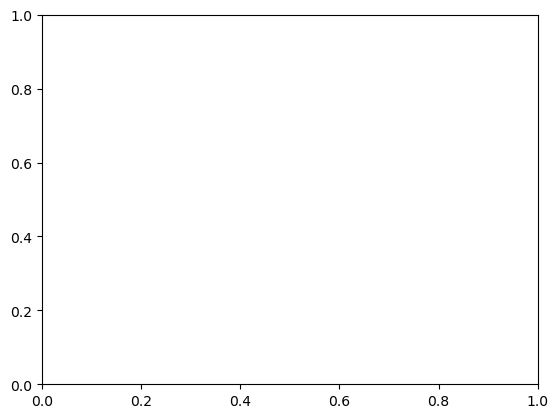

In [61]:
plt.scatter(range(1,3988),sigmatile1,s=2)

In [ ]:
plt.scatter(range(1,3988),(stdev1[(L+1):(n-1)]*(norm.ppf(tau,0,1))),s=2)

In [ ]:
ainfinal1